In [1]:
import gdown
import tarfile
import os
import shutil
import itertools
import fnmatch
from PIL import Image
import time

In [3]:
from tqdm import tqdm

In [36]:
dest = "/media/SSD2/Dataset/Tiny_ImageNet_C/Classified_3"
source = "/media/SSD2/Dataset/tiny-imagenet-200"

In [25]:
len(list(os.listdir(source+"/train")))

200

In [38]:
len(list(os.listdir(dest)))

9

In [42]:
a = [1,2,3,4]
sum(a)

10

In [45]:
for d in os.listdir(dest):
    total=0
    for c in os.listdir(os.path.join(dest,d)):
        total+=len(os.listdir(os.path.join(dest,d,c)))
    print(d," ",total)    

real_val   1800
digital   10000
weather   10000
real_train   100000
blur   10000
noise   10000


In [10]:
k=0
for folder in os.listdir(source+"/train"):
    m = len(list(os.listdir(source+"/train/"+folder+"/images")))
    if m != 500:
        print(folder,m)
        
    else:
        print(k)
    k+=1    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [13]:
for folder in os.listdir(source+"/train"):
    st = source+"/train/"+folder+"/images" #class
    dt = os.path.join(dest,folder)
    if not os.path.exists(dt):
        os.mkdir(dt)
    for file in os.listdir(st):
        im = Image.open(st+"/"+file)
        rgb_im = im.convert('RGB')
        rgb_im.save(dt+'/'+file.split(".")[0]+".jpg")

In [14]:
len(list(os.listdir(dest)))

200

In [15]:
k=0
for folder in os.listdir(dest):
    m = len(list(os.listdir(dest+"/"+folder)))
    if m == 500:
        print(k)
        
    else:
        print(folder,m)
    k+=1    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [11]:
## val

In [2]:
with open('/media/SSD2/Dataset/tiny-imagenet-200/val/val_annotations.txt') as f:
    lines = f.readlines()

In [3]:
anno = [i.split("\t") for i in lines]

In [4]:
anno[0:10]

[['val_0.JPEG', 'n03444034', '0', '32', '44', '62\n'],
 ['val_1.JPEG', 'n04067472', '52', '55', '57', '59\n'],
 ['val_2.JPEG', 'n04070727', '4', '0', '60', '55\n'],
 ['val_3.JPEG', 'n02808440', '3', '3', '63', '63\n'],
 ['val_4.JPEG', 'n02808440', '9', '27', '63', '48\n'],
 ['val_5.JPEG', 'n04399382', '7', '0', '59', '63\n'],
 ['val_6.JPEG', 'n04179913', '0', '0', '63', '56\n'],
 ['val_7.JPEG', 'n02823428', '5', '0', '57', '63\n'],
 ['val_8.JPEG', 'n04146614', '0', '31', '60', '60\n'],
 ['val_9.JPEG', 'n02226429', '0', '3', '63', '57\n']]

In [6]:
len(list(os.listdir("/media/SSD2/Dataset/tiny-imagenet-200/val/images/")))

10000

In [8]:
k=0
for j in anno:
    im = Image.open("/media/SSD2/Dataset/tiny-imagenet-200/val/images/"+j[0])
    rgb_im = im.convert('RGB')
    if os.path.exists(dest+'/'+j[1]):
        rgb_im.save(dest+'/'+j[1]+"/"+j[1]+"_"+j[0][:5]+".jpg")
        k+=1
        print(k," * ")
    else:
        os.mkdir(dest+'/'+j[1])
        rgb_im.save(dest+'/'+j[1]+"/"+j[1]+"_"+j[0][:5]+".jpg")
        k+=1
        print(k)

1
2
3
4
5  * 
6
7
8
9
10
11
12
13  * 
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28  * 
29  * 
30
31
32
33  * 
34
35
36
37
38
39
40
41  * 
42  * 
43
44
45
46  * 
47
48
49
50
51
52
53  * 
54
55
56
57
58
59
60
61  * 
62
63  * 
64
65
66
67
68  * 
69
70
71
72
73  * 
74
75
76
77
78
79
80
81
82
83
84
85  * 
86  * 
87  * 
88
89  * 
90
91
92  * 
93  * 
94
95  * 
96
97  * 
98  * 
99
100  * 
101  * 
102
103
104  * 
105  * 
106  * 
107
108  * 
109
110
111
112
113  * 
114
115
116  * 
117  * 
118  * 
119
120  * 
121
122  * 
123
124
125  * 
126  * 
127
128
129  * 
130
131
132
133  * 
134  * 
135
136
137  * 
138  * 
139
140  * 
141  * 
142
143
144  * 
145
146
147
148  * 
149  * 
150  * 
151
152
153
154  * 
155  * 
156
157
158
159  * 
160
161  * 
162  * 
163  * 
164  * 
165
166  * 
167
168  * 
169  * 
170  * 
171  * 
172  * 
173  * 
174  * 
175  * 
176
177
178  * 
179  * 
180  * 
181  * 
182
183
184  * 
185
186  * 
187
188  * 
189
190
191  * 
192
193
194
195  * 
196  * 
197
198  * 
199  * 
200
201  * 


1153  * 
1154  * 
1155  * 
1156  * 
1157  * 
1158  * 
1159  * 
1160  * 
1161  * 
1162  * 
1163  * 
1164  * 
1165  * 
1166  * 
1167  * 
1168  * 
1169  * 
1170  * 
1171  * 
1172  * 
1173  * 
1174  * 
1175  * 
1176  * 
1177  * 
1178  * 
1179  * 
1180  * 
1181  * 
1182  * 
1183  * 
1184  * 
1185  * 
1186  * 
1187  * 
1188  * 
1189  * 
1190  * 
1191  * 
1192  * 
1193  * 
1194  * 
1195  * 
1196  * 
1197  * 
1198  * 
1199  * 
1200  * 
1201  * 
1202  * 
1203  * 
1204  * 
1205  * 
1206  * 
1207  * 
1208  * 
1209  * 
1210  * 
1211  * 
1212  * 
1213  * 
1214  * 
1215  * 
1216  * 
1217  * 
1218  * 
1219  * 
1220  * 
1221  * 
1222  * 
1223  * 
1224  * 
1225  * 
1226  * 
1227  * 
1228  * 
1229  * 
1230  * 
1231  * 
1232  * 
1233  * 
1234  * 
1235  * 
1236  * 
1237  * 
1238  * 
1239  * 
1240  * 
1241  * 
1242  * 
1243  * 
1244  * 
1245  * 
1246  * 
1247  * 
1248  * 
1249  * 
1250  * 
1251  * 
1252  * 
1253  * 
1254  * 
1255  * 
1256  * 
1257  * 
1258  * 
1259  * 
1260  * 
1261  * 
1262  * 
1263  * 
1

2335  * 
2336  * 
2337  * 
2338  * 
2339  * 
2340  * 
2341  * 
2342  * 
2343  * 
2344  * 
2345  * 
2346  * 
2347  * 
2348  * 
2349  * 
2350  * 
2351  * 
2352  * 
2353  * 
2354  * 
2355  * 
2356  * 
2357  * 
2358  * 
2359  * 
2360  * 
2361  * 
2362  * 
2363  * 
2364  * 
2365  * 
2366  * 
2367  * 
2368  * 
2369  * 
2370  * 
2371  * 
2372  * 
2373  * 
2374  * 
2375  * 
2376  * 
2377  * 
2378  * 
2379  * 
2380  * 
2381  * 
2382  * 
2383  * 
2384  * 
2385  * 
2386  * 
2387  * 
2388  * 
2389  * 
2390  * 
2391  * 
2392  * 
2393  * 
2394  * 
2395  * 
2396  * 
2397  * 
2398  * 
2399  * 
2400  * 
2401  * 
2402  * 
2403  * 
2404  * 
2405  * 
2406  * 
2407  * 
2408  * 
2409  * 
2410  * 
2411  * 
2412  * 
2413  * 
2414  * 
2415  * 
2416  * 
2417  * 
2418  * 
2419  * 
2420  * 
2421  * 
2422  * 
2423  * 
2424  * 
2425  * 
2426  * 
2427  * 
2428  * 
2429  * 
2430  * 
2431  * 
2432  * 
2433  * 
2434  * 
2435  * 
2436  * 
2437  * 
2438  * 
2439  * 
2440  * 
2441  * 
2442  * 
2443  * 
2444  * 
2445  * 
2

3512  * 
3513  * 
3514  * 
3515  * 
3516  * 
3517  * 
3518  * 
3519  * 
3520  * 
3521  * 
3522  * 
3523  * 
3524  * 
3525  * 
3526  * 
3527  * 
3528  * 
3529  * 
3530  * 
3531  * 
3532  * 
3533  * 
3534  * 
3535  * 
3536  * 
3537  * 
3538  * 
3539  * 
3540  * 
3541  * 
3542  * 
3543  * 
3544  * 
3545  * 
3546  * 
3547  * 
3548  * 
3549  * 
3550  * 
3551  * 
3552  * 
3553  * 
3554  * 
3555  * 
3556  * 
3557  * 
3558  * 
3559  * 
3560  * 
3561  * 
3562  * 
3563  * 
3564  * 
3565  * 
3566  * 
3567  * 
3568  * 
3569  * 
3570  * 
3571  * 
3572  * 
3573  * 
3574  * 
3575  * 
3576  * 
3577  * 
3578  * 
3579  * 
3580  * 
3581  * 
3582  * 
3583  * 
3584  * 
3585  * 
3586  * 
3587  * 
3588  * 
3589  * 
3590  * 
3591  * 
3592  * 
3593  * 
3594  * 
3595  * 
3596  * 
3597  * 
3598  * 
3599  * 
3600  * 
3601  * 
3602  * 
3603  * 
3604  * 
3605  * 
3606  * 
3607  * 
3608  * 
3609  * 
3610  * 
3611  * 
3612  * 
3613  * 
3614  * 
3615  * 
3616  * 
3617  * 
3618  * 
3619  * 
3620  * 
3621  * 
3622  * 
3

4685  * 
4686  * 
4687  * 
4688  * 
4689  * 
4690  * 
4691  * 
4692  * 
4693  * 
4694  * 
4695  * 
4696  * 
4697  * 
4698  * 
4699  * 
4700  * 
4701  * 
4702  * 
4703  * 
4704  * 
4705  * 
4706  * 
4707  * 
4708  * 
4709  * 
4710  * 
4711  * 
4712  * 
4713  * 
4714  * 
4715  * 
4716  * 
4717  * 
4718  * 
4719  * 
4720  * 
4721  * 
4722  * 
4723  * 
4724  * 
4725  * 
4726  * 
4727  * 
4728  * 
4729  * 
4730  * 
4731  * 
4732  * 
4733  * 
4734  * 
4735  * 
4736  * 
4737  * 
4738  * 
4739  * 
4740  * 
4741  * 
4742  * 
4743  * 
4744  * 
4745  * 
4746  * 
4747  * 
4748  * 
4749  * 
4750  * 
4751  * 
4752  * 
4753  * 
4754  * 
4755  * 
4756  * 
4757  * 
4758  * 
4759  * 
4760  * 
4761  * 
4762  * 
4763  * 
4764  * 
4765  * 
4766  * 
4767  * 
4768  * 
4769  * 
4770  * 
4771  * 
4772  * 
4773  * 
4774  * 
4775  * 
4776  * 
4777  * 
4778  * 
4779  * 
4780  * 
4781  * 
4782  * 
4783  * 
4784  * 
4785  * 
4786  * 
4787  * 
4788  * 
4789  * 
4790  * 
4791  * 
4792  * 
4793  * 
4794  * 
4795  * 
4

5860  * 
5861  * 
5862  * 
5863  * 
5864  * 
5865  * 
5866  * 
5867  * 
5868  * 
5869  * 
5870  * 
5871  * 
5872  * 
5873  * 
5874  * 
5875  * 
5876  * 
5877  * 
5878  * 
5879  * 
5880  * 
5881  * 
5882  * 
5883  * 
5884  * 
5885  * 
5886  * 
5887  * 
5888  * 
5889  * 
5890  * 
5891  * 
5892  * 
5893  * 
5894  * 
5895  * 
5896  * 
5897  * 
5898  * 
5899  * 
5900  * 
5901  * 
5902  * 
5903  * 
5904  * 
5905  * 
5906  * 
5907  * 
5908  * 
5909  * 
5910  * 
5911  * 
5912  * 
5913  * 
5914  * 
5915  * 
5916  * 
5917  * 
5918  * 
5919  * 
5920  * 
5921  * 
5922  * 
5923  * 
5924  * 
5925  * 
5926  * 
5927  * 
5928  * 
5929  * 
5930  * 
5931  * 
5932  * 
5933  * 
5934  * 
5935  * 
5936  * 
5937  * 
5938  * 
5939  * 
5940  * 
5941  * 
5942  * 
5943  * 
5944  * 
5945  * 
5946  * 
5947  * 
5948  * 
5949  * 
5950  * 
5951  * 
5952  * 
5953  * 
5954  * 
5955  * 
5956  * 
5957  * 
5958  * 
5959  * 
5960  * 
5961  * 
5962  * 
5963  * 
5964  * 
5965  * 
5966  * 
5967  * 
5968  * 
5969  * 
5970  * 
5

7028  * 
7029  * 
7030  * 
7031  * 
7032  * 
7033  * 
7034  * 
7035  * 
7036  * 
7037  * 
7038  * 
7039  * 
7040  * 
7041  * 
7042  * 
7043  * 
7044  * 
7045  * 
7046  * 
7047  * 
7048  * 
7049  * 
7050  * 
7051  * 
7052  * 
7053  * 
7054  * 
7055  * 
7056  * 
7057  * 
7058  * 
7059  * 
7060  * 
7061  * 
7062  * 
7063  * 
7064  * 
7065  * 
7066  * 
7067  * 
7068  * 
7069  * 
7070  * 
7071  * 
7072  * 
7073  * 
7074  * 
7075  * 
7076  * 
7077  * 
7078  * 
7079  * 
7080  * 
7081  * 
7082  * 
7083  * 
7084  * 
7085  * 
7086  * 
7087  * 
7088  * 
7089  * 
7090  * 
7091  * 
7092  * 
7093  * 
7094  * 
7095  * 
7096  * 
7097  * 
7098  * 
7099  * 
7100  * 
7101  * 
7102  * 
7103  * 
7104  * 
7105  * 
7106  * 
7107  * 
7108  * 
7109  * 
7110  * 
7111  * 
7112  * 
7113  * 
7114  * 
7115  * 
7116  * 
7117  * 
7118  * 
7119  * 
7120  * 
7121  * 
7122  * 
7123  * 
7124  * 
7125  * 
7126  * 
7127  * 
7128  * 
7129  * 
7130  * 
7131  * 
7132  * 
7133  * 
7134  * 
7135  * 
7136  * 
7137  * 
7138  * 
7

8206  * 
8207  * 
8208  * 
8209  * 
8210  * 
8211  * 
8212  * 
8213  * 
8214  * 
8215  * 
8216  * 
8217  * 
8218  * 
8219  * 
8220  * 
8221  * 
8222  * 
8223  * 
8224  * 
8225  * 
8226  * 
8227  * 
8228  * 
8229  * 
8230  * 
8231  * 
8232  * 
8233  * 
8234  * 
8235  * 
8236  * 
8237  * 
8238  * 
8239  * 
8240  * 
8241  * 
8242  * 
8243  * 
8244  * 
8245  * 
8246  * 
8247  * 
8248  * 
8249  * 
8250  * 
8251  * 
8252  * 
8253  * 
8254  * 
8255  * 
8256  * 
8257  * 
8258  * 
8259  * 
8260  * 
8261  * 
8262  * 
8263  * 
8264  * 
8265  * 
8266  * 
8267  * 
8268  * 
8269  * 
8270  * 
8271  * 
8272  * 
8273  * 
8274  * 
8275  * 
8276  * 
8277  * 
8278  * 
8279  * 
8280  * 
8281  * 
8282  * 
8283  * 
8284  * 
8285  * 
8286  * 
8287  * 
8288  * 
8289  * 
8290  * 
8291  * 
8292  * 
8293  * 
8294  * 
8295  * 
8296  * 
8297  * 
8298  * 
8299  * 
8300  * 
8301  * 
8302  * 
8303  * 
8304  * 
8305  * 
8306  * 
8307  * 
8308  * 
8309  * 
8310  * 
8311  * 
8312  * 
8313  * 
8314  * 
8315  * 
8316  * 
8

9379  * 
9380  * 
9381  * 
9382  * 
9383  * 
9384  * 
9385  * 
9386  * 
9387  * 
9388  * 
9389  * 
9390  * 
9391  * 
9392  * 
9393  * 
9394  * 
9395  * 
9396  * 
9397  * 
9398  * 
9399  * 
9400  * 
9401  * 
9402  * 
9403  * 
9404  * 
9405  * 
9406  * 
9407  * 
9408  * 
9409  * 
9410  * 
9411  * 
9412  * 
9413  * 
9414  * 
9415  * 
9416  * 
9417  * 
9418  * 
9419  * 
9420  * 
9421  * 
9422  * 
9423  * 
9424  * 
9425  * 
9426  * 
9427  * 
9428  * 
9429  * 
9430  * 
9431  * 
9432  * 
9433  * 
9434  * 
9435  * 
9436  * 
9437  * 
9438  * 
9439  * 
9440  * 
9441  * 
9442  * 
9443  * 
9444  * 
9445  * 
9446  * 
9447  * 
9448  * 
9449  * 
9450  * 
9451  * 
9452  * 
9453  * 
9454  * 
9455  * 
9456  * 
9457  * 
9458  * 
9459  * 
9460  * 
9461  * 
9462  * 
9463  * 
9464  * 
9465  * 
9466  * 
9467  * 
9468  * 
9469  * 
9470  * 
9471  * 
9472  * 
9473  * 
9474  * 
9475  * 
9476  * 
9477  * 
9478  * 
9479  * 
9480  * 
9481  * 
9482  * 
9483  * 
9484  * 
9485  * 
9486  * 
9487  * 
9488  * 
9489  * 
9

In [ ]:
#Tiny_ImageNet_C

In [4]:
dest = "/media/SSD2/Dataset/Tiny_ImageNet_C/Classified_3"
source = "/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C"

In [5]:
len(list(os.listdir(source)))

15

In [5]:
c = list(os.listdir(source))
c

['jpeg_compression',
 'impulse_noise',
 'elastic_transform',
 'zoom_blur',
 'brightness',
 'motion_blur',
 'pixelate',
 'contrast',
 'snow',
 'frost',
 'fog',
 'defocus_blur',
 'shot_noise',
 'gaussian_noise',
 'glass_blur']

In [6]:
blur = ['zoom_blur','glass_blur','defocus_blur','motion_blur']
noise = ['gaussian_noise','shot_noise','impulse_noise']
weather = ['snow','frost','fog','brightness']
digital = ['jpeg_compression', 'elastic_transform', 'pixelate', 'contrast']

In [7]:
dictionary = {"blur":blur,"noise":noise, "weather":weather, "digital":digital}

In [8]:
domains = list(dictionary.keys())

In [9]:
[i for i in dictionary.items()]

[('blur', ['zoom_blur', 'glass_blur', 'defocus_blur', 'motion_blur']),
 ('noise', ['gaussian_noise', 'shot_noise', 'impulse_noise']),
 ('weather', ['snow', 'frost', 'fog', 'brightness']),
 ('digital',
  ['jpeg_compression', 'elastic_transform', 'pixelate', 'contrast'])]

In [15]:
all_d = {}
for k in c:
    for i in dictionary.items():
        if k in i[1]:
            all_d[k]=i[0]
all_d            

{'jpeg_compression': 'digital',
 'impulse_noise': 'noise',
 'elastic_transform': 'digital',
 'zoom_blur': 'blur',
 'brightness': 'weather',
 'motion_blur': 'blur',
 'pixelate': 'digital',
 'contrast': 'digital',
 'snow': 'weather',
 'frost': 'weather',
 'fog': 'weather',
 'defocus_blur': 'blur',
 'shot_noise': 'noise',
 'gaussian_noise': 'noise',
 'glass_blur': 'blur'}

In [11]:
all_d = {'defocus_blur': 'blur',
 'shot_noise': 'noise',
 'gaussian_noise': 'noise',
 'glass_blur': 'blur'}

In [16]:
for sub_domain in (all_d):
    print(sub_domain)

jpeg_compression
impulse_noise
elastic_transform
zoom_blur
brightness
motion_blur
pixelate
contrast
snow
frost
fog
defocus_blur
shot_noise
gaussian_noise
glass_blur


In [17]:
dest = "/media/SSD2/Dataset/Imagenet-C/processed_2"
source = "/media/SSD2/Dataset/Imagenet-C/all_image"

In [18]:
for sub_domain in tqdm(all_d):
    for severity in range(1,6):
        severity = str(severity)
        if not os.path.exists(os.path.join(dest,all_d[sub_domain]+"_"+severity)):
            os.mkdir(os.path.join(dest,all_d[sub_domain]+"_"+severity))
        for classes in os.listdir(os.path.join(source,all_d[sub_domain],sub_domain,severity)):
            if not os.path.exists(os.path.join(dest,all_d[sub_domain]+"_"+severity,classes)):
                os.mkdir(os.path.join(dest,all_d[sub_domain]+"_"+severity,classes))
            for images in os.listdir(os.path.join(source,all_d[sub_domain],sub_domain,severity,classes)):
                im = Image.open(os.path.join(source,all_d[sub_domain],sub_domain,severity,classes,images))
                rgb_im = im.convert('RGB')
                rgb_im.save(os.path.join(dest,all_d[sub_domain]+"_"+severity,classes,images.split(".")[0]+"_"+sub_domain+"_"+severity+".jpg"))
    
                
           
        
    

100%|██████████| 15/15 [2:46:17<00:00, 665.14s/it] 


In [9]:
len(list(os.listdir(os.path.join(source,blur[0],"3"))))

200

In [18]:
url = [source+"/"+"/".join(i) for i in list(itertools.product(c,["3"]))]
url

['/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/jpeg_compression/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/impulse_noise/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/elastic_transform/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/zoom_blur/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/brightness/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/motion_blur/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/pixelate/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/contrast/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/snow/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/frost/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/fog/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/defocus_blur/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/shot_noise/3',
 '/media/SSD2/Dataset/Tiny_ImageNet_C/Tiny-ImageNet-C/gaussian_noise/3',
 '/media/SSD2/Dataset/Tiny_ImageNe

In [21]:
classes = list(os.listdir(os.path.join(source,blur[0],"3")))
list(itertools.product(c,["3"],classes))[0:10]   

[('jpeg_compression', '3', 'n07583066'),
 ('jpeg_compression', '3', 'n04099969'),
 ('jpeg_compression', '3', 'n03201208'),
 ('jpeg_compression', '3', 'n04398044'),
 ('jpeg_compression', '3', 'n01945685'),
 ('jpeg_compression', '3', 'n04311004'),
 ('jpeg_compression', '3', 'n04596742'),
 ('jpeg_compression', '3', 'n02927161'),
 ('jpeg_compression', '3', 'n04118538'),
 ('jpeg_compression', '3', 'n02395406')]

In [23]:
len(list(itertools.product(c,["3"],classes)))

3000

In [41]:
m=0
n=0
for i in list(itertools.product(c,["3"],classes)):
    url = source+"/"+"/".join(i)
    ds = os.path.join(dest,all_d[i[0]],i[2])
    if not os.path.exists(ds):
        os.mkdir(ds)
    for file in os.listdir(url):
        im = Image.open(os.path.join(url,file))
        rgb_im = im.convert('RGB')
        rgb_im.save(os.path.join(ds,i[2]+"_"+file.split(".")[0]+".jpg"))
    if not len(os.listdir(url)) == len(os.listdir(ds)):
        n+=1
        print(url,len(os.listdir(url)),len(os.listdir(ds)))
    else:
        m+=1
    if m%500 == 0:
        print(m,n)
        
    
#     for files in os.listdir(url):
#         ds = os.path.join(dest,)

500 0
1000 0
1500 0
2000 0
2500 0
3000 0


In [45]:
num=0
for j in os.listdir(dest):
    for k in os.listdir(os.path.join(dest,j)):
        num+=len(list(os.listdir(os.path.join(dest,j,k))))
num    

141800

In [22]:
i,j,k=0,0,0
for _,h in enumerate([]):
    if i == 0:
        i+=1
    else:
        if j==0:
            j+=2
            print("*")
            continue
           
    k+=2
i,j,k    

*


(1, 2, 6)

In [19]:
b=[1,2,3,4,5]
b.remove(1)
b.remove(2)
b

[3, 4, 5]

In [46]:
k=(9,2)
k[0]

9

In [48]:
environments = [f.name for f in os.scandir("/media/SSD2/Dataset/ImageNet_9") if f.is_dir()]
sorted(environments)

['mixed_next', 'mixed_rand', 'mixed_same', 'no_fg', 'only_fg', 'original']

In [3]:
blur = ['zoom_blur','glass_blur','defocus_blur','motion_blur']
noise = ['gaussian_noise','shot_noise','impulse_noise']
digital = ['jpeg_compression', 'elastic_transform', 'pixelate', 'contrast']
dictionary = {"blur":blur,"noise":noise, "digital":digital}

In [5]:
all_d = {}
for k in blur+noise+digital+weather:
    for i in dictionary.items():
        if k in i[1]:
            all_d[k]=i[0]
all_d  

{'zoom_blur': 'blur',
 'glass_blur': 'blur',
 'defocus_blur': 'blur',
 'motion_blur': 'blur',
 'gaussian_noise': 'noise',
 'shot_noise': 'noise',
 'impulse_noise': 'noise',
 'jpeg_compression': 'digital',
 'elastic_transform': 'digital',
 'pixelate': 'digital',
 'contrast': 'digital',
 'snow': 'weather',
 'frost': 'weather',
 'fog': 'weather',
 'brightness': 'weather'}

In [7]:
val_data = dict()

In [8]:
for i in os.listdir("/media/SSD2/Dataset/Imagenet-C/all_image/blur/defocus_blur/3"):
    val_data[i] = sorted(os.listdir(os.path.join("/media/SSD2/Dataset/Imagenet-C/all_image/blur/defocus_blur/3",i)))[:10]

In [9]:
val_data["n01440764"]

['ILSVRC2012_val_00000293.JPEG',
 'ILSVRC2012_val_00002138.JPEG',
 'ILSVRC2012_val_00003014.JPEG',
 'ILSVRC2012_val_00006697.JPEG',
 'ILSVRC2012_val_00007197.JPEG',
 'ILSVRC2012_val_00009111.JPEG',
 'ILSVRC2012_val_00009191.JPEG',
 'ILSVRC2012_val_00009346.JPEG',
 'ILSVRC2012_val_00009379.JPEG',
 'ILSVRC2012_val_00009396.JPEG']

In [40]:
url = os.path.join("/media/SSD2/Dataset/Imagenet-C/real","n01440764")


In [10]:
len(all_d)

15

In [11]:
for classes in val_data:
    for domain in all_d:
        url = os.path.join("/media/SSD2/Dataset/Imagenet-C/all_image",all_d[domain],domain,"1",classes)
        if not val_data[classes] == sorted(os.listdir(url))[:10]:
            print(all_d[domain],domain,classes)

In [12]:
for classes in val_data:
    url = os.path.join("/media/SSD2/Dataset/Imagenet-C/real",classes)
    if not [d.split(".")[0] for d in val_data[classes]] == [k.split(".")[0] for k in sorted(os.listdir(url))[:10]]:
        print(classes)

In [13]:
for classes in tqdm(val_data):
    for domain in all_d:
        for s in range(1,6):
            if not os.path.exists(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed",all_d[domain]+"_"+str(s))):
                os.mkdir(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed",all_d[domain]+"_"+str(s)))
            if not os.path.exists(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed",all_d[domain]+"_"+str(s),classes)):
                os.mkdir(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed",all_d[domain]+"_"+str(s),classes))    
            url = os.path.join("/media/SSD2/Dataset/Imagenet-C/all_image",all_d[domain],domain,str(s),classes)
          
            for file in sorted(os.listdir(url))[:10]:
                im = Image.open(os.path.join(url,file))
                rgb_im = im.convert('RGB')
                rgb_im.save(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed",all_d[domain]+"_"+str(s),classes,file.split(".")[0]+".jpg"))
                


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [31:10<00:00,  1.87s/it]


In [17]:
for classes in tqdm(val_data):
    if not os.path.exists(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed/real_val",classes)):
        os.mkdir(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed/real_val",classes))
    if not os.path.exists(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed/real",classes)):
        os.mkdir(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed/real",classes))
    url = os.path.join("/media/SSD2/Dataset/Imagenet-C/real",classes)
    for file1 in sorted(os.listdir(url))[:10]:
        im = Image.open(os.path.join(url,file1))
        rgb_im = im.convert('RGB')
        rgb_im.save(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed/real_val",classes,file1.split(".")[0]+".jpg"))
    for file in sorted(os.listdir(url))[10:]:
        im = Image.open(os.path.join(url,file))
        rgb_im = im.convert('RGB')
        rgb_im.save(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed/real",classes,file.split(".")[0]+".jpg"))
                


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:57<00:00,  8.52it/s]


In [71]:
read = dict()
for file in os.listdir("/media/SSD2/Dataset/Imagenet-C/processed_2"):
    read[file]=0
    for classes in os.listdir(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed_2",file)):
        read[file]+=len(os.listdir(os.path.join("/media/SSD2/Dataset/Imagenet-C/processed_2",file,classes)))

In [72]:
read


{'digital_4': 50000,
 'digital_3': 50000,
 'digital_2': 50000,
 'digital_5': 50000,
 'digital_1': 50000}

In [27]:
for domains in os.listdir(os.path.join(dest)):
    for classes in os.listdir(os.path.join(dest,domains)):
        if len(os.listdir(os.path.join(dest,domains,classes))) != 150:
            print(domains,classes,len(os.listdir(os.path.join(dest,domains,classes))))

digital_4 n03590841 50
digital_4 n02093428 50
digital_4 n01990800 50
digital_4 n02981792 50
digital_4 n02277742 50
digital_4 n02100877 50
digital_4 n04317175 50
digital_4 n03781244 50
digital_4 n02128757 50
digital_4 n03483316 50
digital_4 n04482393 50
digital_4 n07583066 50
digital_4 n02490219 50
digital_4 n01773549 50
digital_4 n02791124 50
digital_4 n02113023 50
digital_4 n03216828 50
digital_4 n02018795 50
digital_4 n02011460 50
digital_4 n03445777 50
digital_4 n02109961 50
digital_4 n03947888 50
digital_4 n03379051 50
digital_4 n04099969 50
digital_4 n02096177 50
digital_4 n04154565 50
digital_4 n02114712 50
digital_4 n04041544 50
digital_4 n03201208 50
digital_4 n01644373 50
digital_4 n04398044 50
digital_4 n02704792 50
digital_4 n01945685 50
digital_4 n04355933 50
digital_4 n03196217 50
digital_4 n12144580 50
digital_4 n02971356 50
digital_4 n02099429 50
digital_4 n03388549 50
digital_4 n04311004 50
digital_4 n03891251 50
digital_4 n02091635 50
digital_4 n04596742 50
digital_4 n

digital_3 n01632458 50
digital_3 n03495258 50
digital_3 n02190166 50
digital_3 n04612504 50
digital_3 n03602883 50
digital_3 n03290653 50
digital_3 n02098286 50
digital_3 n01770081 50
digital_3 n02097298 50
digital_3 n03529860 50
digital_3 n02667093 50
digital_3 n03032252 50
digital_3 n02804414 50
digital_3 n04131690 50
digital_3 n01616318 50
digital_3 n03796401 50
digital_3 n02443114 50
digital_3 n02086910 50
digital_3 n02444819 50
digital_3 n03376595 50
digital_3 n03877472 50
digital_3 n02397096 50
digital_3 n09332890 50
digital_3 n02415577 50
digital_3 n02002724 50
digital_3 n02114367 50
digital_3 n03355925 50
digital_3 n04560804 50
digital_3 n02100236 50
digital_3 n04141975 50
digital_3 n03721384 50
digital_3 n07715103 50
digital_3 n02777292 50
digital_3 n02172182 50
digital_3 n03670208 50
digital_3 n01734418 50
digital_3 n04346328 50
digital_3 n04209239 50
digital_3 n03868863 50
digital_3 n04330267 50
digital_3 n02492660 50
digital_3 n01729977 50
digital_3 n03944341 50
digital_3 n

weather_2 n02091032 50
weather_2 n04251144 50
weather_2 n02526121 50
weather_2 n01847000 50
weather_2 n02782093 50
weather_2 n01687978 50
weather_2 n02101556 50
weather_2 n03047690 50
weather_2 n03016953 50
weather_2 n01632777 50
weather_2 n02108089 50
weather_2 n03759954 50
weather_2 n07875152 50
weather_2 n04409515 50
weather_2 n04044716 50
weather_2 n02097130 50
weather_2 n03788365 50
weather_2 n01751748 50
weather_2 n02099712 50
weather_2 n02802426 50
weather_2 n04507155 50
weather_2 n02823428 50
weather_2 n02106550 50
weather_2 n01806567 50
weather_2 n02422699 50
weather_2 n04026417 50
weather_2 n01873310 50
weather_2 n02794156 50
weather_2 n03595614 50
weather_2 n07714990 50
weather_2 n04366367 50
weather_2 n03124043 50
weather_2 n01855032 50
weather_2 n04311174 50
weather_2 n01828970 50
weather_2 n02089973 50
weather_2 n02442845 50
weather_2 n03908714 50
weather_2 n04417672 50
weather_2 n03445924 50
weather_2 n04517823 50
weather_2 n03485794 50
weather_2 n01795545 50
weather_2 n

digital_5 n04447861 50
digital_5 n03733131 50
digital_5 n04111531 50
digital_5 n02093754 50
digital_5 n02107312 50
digital_5 n02786058 50
digital_5 n04371430 50
digital_5 n15075141 50
digital_5 n01601694 50
digital_5 n03447447 50
digital_5 n01968897 50
digital_5 n03916031 50
digital_5 n03854065 50
digital_5 n02655020 50
digital_5 n04389033 50
digital_5 n01665541 50
digital_5 n02410509 50
digital_5 n06785654 50
digital_5 n02105251 50
digital_5 n02788148 50
digital_5 n04133789 50
digital_5 n03814639 50
digital_5 n04597913 50
digital_5 n04589890 50
digital_5 n03773504 50
digital_5 n02692877 50
digital_5 n03095699 50
digital_5 n01753488 50
digital_5 n03884397 50
digital_5 n01773157 50
digital_5 n02276258 50
digital_5 n04192698 50
digital_5 n02643566 50
digital_5 n06794110 50
digital_5 n02002556 50
digital_5 n02108915 50
digital_5 n01685808 50
digital_5 n07860988 50
digital_5 n09428293 50
digital_5 n02974003 50
digital_5 n03394916 50
digital_5 n03983396 50
digital_5 n02088632 50
digital_5 n

weather_3 n01580077 50
weather_3 n01843383 50
weather_3 n01773797 50
weather_3 n04033995 50
weather_3 n02441942 50
weather_3 n04116512 50
weather_3 n03126707 50
weather_3 n02088238 50
weather_3 n04127249 50
weather_3 n02749479 50
weather_3 n02013706 50
weather_3 n01614925 50
weather_3 n02117135 50
weather_3 n02869837 50
weather_3 n02361337 50
weather_3 n01882714 50
weather_3 n03729826 50
weather_3 n02108551 50
weather_3 n02489166 50
weather_3 n01692333 50
weather_3 n02097047 50
weather_3 n02879718 50
weather_3 n03584254 50
weather_3 n03110669 50
weather_3 n02113799 50
weather_3 n02111500 50
weather_3 n07718472 50
weather_3 n04380533 50
weather_3 n02504013 50
weather_3 n01729322 50
weather_3 n01608432 50
weather_3 n02112350 50
weather_3 n02088466 50
weather_3 n12267677 50
weather_3 n06596364 50
weather_3 n02256656 50
weather_3 n03661043 50
weather_3 n11939491 50
weather_3 n01806143 50
weather_3 n02910353 50
weather_3 n02066245 50
weather_3 n02138441 50
weather_3 n03937543 50
weather_3 n

noise_3 n01775062 50
noise_3 n07932039 50
noise_3 n02094114 50
noise_3 n02107142 50
noise_3 n03125729 50
noise_3 n02443484 50
noise_3 n01669191 50
noise_3 n02281406 50
noise_3 n04599235 50
noise_3 n04074963 50
noise_3 n02120505 50
noise_3 n01693334 50
noise_3 n03272010 50
noise_3 n02979186 50
noise_3 n07753275 50
noise_3 n02096294 50
noise_3 n02841315 50
noise_3 n02088364 50
noise_3 n03775546 50
noise_3 n01843065 50
noise_3 n02095570 50
noise_3 n03692522 50
noise_3 n03970156 50
noise_3 n02988304 50
noise_3 n02107574 50
noise_3 n03673027 50
noise_3 n03888605 50
noise_3 n02281787 50
noise_3 n03272562 50
noise_3 n01742172 50
noise_3 n03770679 50
noise_3 n03599486 50
noise_3 n02484975 50
noise_3 n02486410 50
noise_3 n04552348 50
noise_3 n07684084 50
noise_3 n03250847 50
noise_3 n04591713 50
noise_3 n03498962 50
noise_3 n04235860 50
noise_3 n03337140 50
noise_3 n03761084 50
noise_3 n03496892 50
noise_3 n03325584 50
noise_3 n12985857 50
noise_3 n04310018 50
noise_3 n03788195 50
noise_3 n0387

weather_1 n01795545 50
weather_1 n04149813 50
weather_1 n07754684 50
weather_1 n13054560 50
weather_1 n04392985 50
weather_1 n03400231 50
weather_1 n03930630 50
weather_1 n03792972 50
weather_1 n04344873 50
weather_1 n01629819 50
weather_1 n04458633 50
weather_1 n04081281 50
weather_1 n04493381 50
weather_1 n01910747 50
weather_1 n02978881 50
weather_1 n03877845 50
weather_1 n02279972 50
weather_1 n03623198 50
weather_1 n02105162 50
weather_1 n03476991 50
weather_1 n03710721 50
weather_1 n02056570 50
weather_1 n02666196 50
weather_1 n03457902 50
weather_1 n02009912 50
weather_1 n07615774 50
weather_1 n02112137 50
weather_1 n03982430 50
weather_1 n03447721 50
weather_1 n03832673 50
weather_1 n04467665 50
weather_1 n04209133 50
weather_1 n02105056 50
weather_1 n02870880 50
weather_1 n04505470 50
weather_1 n04040759 50
weather_1 n02364673 50
weather_1 n04162706 50
weather_1 n03785016 50
weather_1 n03958227 50
weather_1 n02356798 50
weather_1 n02090379 50
weather_1 n02092002 50
weather_1 n

weather_5 n02490219 50
weather_5 n01773549 50
weather_5 n02791124 50
weather_5 n02113023 50
weather_5 n03216828 50
weather_5 n02018795 50
weather_5 n02011460 50
weather_5 n03445777 50
weather_5 n02109961 50
weather_5 n03947888 50
weather_5 n03379051 50
weather_5 n04099969 50
weather_5 n02096177 50
weather_5 n04154565 50
weather_5 n02114712 50
weather_5 n04041544 50
weather_5 n03201208 50
weather_5 n01644373 50
weather_5 n04398044 50
weather_5 n02704792 50
weather_5 n01945685 50
weather_5 n04355933 50
weather_5 n03196217 50
weather_5 n12144580 50
weather_5 n02971356 50
weather_5 n02099429 50
weather_5 n03388549 50
weather_5 n04311004 50
weather_5 n03891251 50
weather_5 n02091635 50
weather_5 n04596742 50
weather_5 n02096437 50
weather_5 n03777754 50
weather_5 n04019541 50
weather_5 n03676483 50
weather_5 n01631663 50
weather_5 n04125021 50
weather_5 n02927161 50
weather_5 n04553703 50
weather_5 n02093256 50
weather_5 n02834397 50
weather_5 n01675722 50
weather_5 n09468604 50
weather_5 n

In [3]:
import os
import json

from torchvision import datasets, transforms
from torchvision.datasets.folder import ImageFolder, default_loader

In [6]:
import torch

In [21]:
dataset = datasets.ImageFolder("/media/SSD2/Dataset/Imagenet-C/processed/blur_1",transforms.ToTensor())

In [22]:
data_loader_train = torch.utils.data.DataLoader(
        dataset, sampler=torch.utils.data.RandomSampler(dataset),
        batch_size=1,
        drop_last=True,
    )

In [33]:
y_label = []
X_label = []
k=0
for i, (X, y) in enumerate(data_loader_train):
    X_label.append(X)
    y_label.append(y)
    k+=1
    if k==5:
        break

In [34]:
y_label


[tensor([900]), tensor([954]), tensor([381]), tensor([312]), tensor([843])]

In [35]:
from PIL import Image
import matplotlib.pyplot as plt

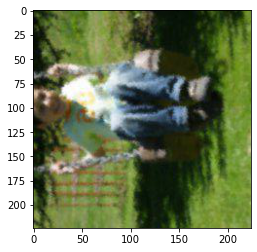

In [55]:
plt.imshow(X_label[4][0].transpose(0,2).detach().numpy())

In [56]:
sorted(os.listdir("/media/SSD2/Dataset/Imagenet-C/processed/blur_1"))[843]

'n04371774'

In [57]:
environments = [f.name for f in os.scandir("/media/SSD2/Dataset/Imagenet-C/processed") if f.is_dir()]
environments = sorted(environments)
environments

['blur_1',
 'blur_2',
 'blur_3',
 'blur_4',
 'blur_5',
 'digital_1',
 'digital_2',
 'digital_3',
 'digital_4',
 'digital_5',
 'noise_1',
 'noise_2',
 'noise_3',
 'noise_4',
 'noise_5',
 'real',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weather_5']